# Convolutional Neural Networks
This notebook will guide you through the use of the `keras` package to train convolutional neural networks for handwritten digits classification. You are going to use the `mnist` dataset from LeCun et al. 1998.

## Loading the packages

In [7]:
%pip install tensorflow --upgrade
%pip install keras --upgrade

import numpy as np
from matplotlib import pyplot as pl

from keras.datasets import fashion_mnist
from keras.models import Model
from keras.layers.core import Dense, Dropout, Flatten
from tensorflow.keras.optimizers import RMSprop
from keras.utils import np_utils
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.layers import Input
from sklearn import metrics as me
from scipy import stats

%matplotlib inline

You should consider upgrading via the 'C:\Users\NelsonWork\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.



Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'C:\Users\NelsonWork\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.


First, create some useful functions

In [8]:
def build_grid_of_images(array):
    assert len(array.shape) == 3
    dim_0 = np.sqrt(array.shape[0])
    assert dim_0.is_integer()
    
    temp_out = np.reshape(array, (dim_0, dim_0, array.shape[1], array.shape[2]))
    temp_out = np.rollaxis(temp_out, 1, 3)
    return np.reshape(temp_out, (dim_0*array.shape[1], dim_0*array.shape[2]))

def plot_conv_layer_output(temp_out, title):
    temp_to_plot = build_grid_of_images(temp_out)
    pl.imshow(temp_to_plot, interpolation='nearest', cmap=pl.get_cmap('Greys'))
    ax = pl.gca()
    ax.set_xticks(np.arange(-0.5, temp_to_plot.shape[0]+0.5, temp_out.shape[1]))    
    ax.set_yticks(np.arange(-0.5, temp_to_plot.shape[0]+0.5, temp_out.shape[2]))
    pl.grid()
    pl.tick_params(axis='both', which='both', bottom='off', top='off', left='off', right='off', labelbottom='off', labelleft='off')
    pl.title(title)

def plot_dense_layer_output(temp_out, title):
    pl.bar(np.arange(temp_out.shape[1])-0.4, temp_out[0,:])
    pl.xlim(-0.5, temp_out.shape[1])
    pl.grid()
    pl.title(title)

def measure_model_perf(model, X_test, Y_test, history, title):
    score = model.evaluate(X_test, Y_test, verbose=1)
    pl.clf()
    pl.plot(history.history['loss'], label='Training')
    pl.plot(history.history['val_loss'], label='Testing')
    pl.ylabel('loss')
    pl.xlabel('Number of epochs')
    pl.title(title + ' Test accuracy: ' + str(round(score[1] * 100, 2)) + '%')
    pl.legend()
    pl.grid()
    pl.savefig('../output/fashion/' + title + '.png', dpi=500)

Load the `mnist` dataset and normalize in the range [0, 1]

In [9]:
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

n_train, height, width = X_train.shape
n_test, _, _ = X_test.shape

X_train = X_train.reshape(n_train, height, width, 1).astype('float32')
X_test = X_test.reshape(n_test, height, width, 1).astype('float32')

X_train /= 255.0
X_test /= 255.0

n_classes = 10

print(n_train, 'train samples')
print(n_test, 'test samples')

# convert class vectors to binary class matrices
Y_train = np_utils.to_categorical(y_train, n_classes)
Y_test = np_utils.to_categorical(y_test, n_classes)

60000 train samples
10000 test samples


Create the CNN and show its architecture

In [7]:
l0 = Input(shape=(height, width, 1), name='l0')

l1 = Conv2D(9, (5, 5), padding='same', activation='relu', name='l1')(l0)
l1_mp = MaxPooling2D(pool_size=(2, 2), name='l1_mp')(l1)

l2 = Conv2D(9, (5, 5), padding='same', activation='relu', name='l2')(l1_mp)
l2_mp = MaxPooling2D(pool_size=(2, 2), name='l2_mp')(l2)

l3 = Conv2D(16, (3, 3), padding='same', activation='relu', name='l3')(l2_mp)
l3_mp = MaxPooling2D(pool_size=(2, 2), name='l3_mp')(l3)

flat = Flatten(name='flat')(l3_mp)

l4 = Dense(25, activation='relu', name='l4')(flat)

l5 = Dense(n_classes, activation='softmax', name='l5')(l4)

model = Model(inputs=l0, outputs=l5)
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 l0 (InputLayer)             [(None, 28, 28, 1)]       0         
                                                                 
 l1 (Conv2D)                 (None, 28, 28, 9)         234       
                                                                 
 l1_mp (MaxPooling2D)        (None, 14, 14, 9)         0         
                                                                 
 l2 (Conv2D)                 (None, 14, 14, 9)         2034      
                                                                 
 l2_mp (MaxPooling2D)        (None, 7, 7, 9)           0         
                                                                 
 l3 (Conv2D)                 (None, 7, 7, 16)          1312      
                                                                 
 l3_mp (MaxPooling2D)        (None, 3, 3, 16)          0     

Define some constants and train de CNN

In [8]:
batch_size = 128
n_epoch = 10

model.compile(loss='categorical_crossentropy', optimizer=RMSprop(), metrics=['accuracy'])
history = model.fit(X_train, Y_train, batch_size=batch_size, epochs=n_epoch, verbose=1, validation_data=(X_test, Y_test))

Epoch 1/10
469/469 [==============================] - 31s 61ms/step - loss: 0.5087 - accuracy: 0.8480 - val_loss: 0.1500 - val_accuracy: 0.9557
Epoch 2/10
469/469 [==============================] - 28s 59ms/step - loss: 0.1415 - accuracy: 0.9568 - val_loss: 0.0973 - val_accuracy: 0.9694
Epoch 3/10
469/469 [==============================] - 29s 62ms/step - loss: 0.0981 - accuracy: 0.9700 - val_loss: 0.0762 - val_accuracy: 0.9754
Epoch 4/10
469/469 [==============================] - 38s 82ms/step - loss: 0.0780 - accuracy: 0.9761 - val_loss: 0.0675 - val_accuracy: 0.9793
Epoch 5/10
469/469 [==============================] - 39s 82ms/step - loss: 0.0662 - accuracy: 0.9800 - val_loss: 0.0572 - val_accuracy: 0.9805
Epoch 6/10
469/469 [==============================] - 39s 83ms/step - loss: 0.0569 - accuracy: 0.9822 - val_loss: 0.0464 - val_accuracy: 0.9856
Epoch 7/10
469/469 [==============================] - 38s 81ms/step - loss: 0.0507 - accuracy: 0.9846 - val_loss: 0.0718 - val_accuracy:

Show the performance of the model

313/313 [==============================] - 2s 6ms/step - loss: 0.0461 - accuracy: 0.9849


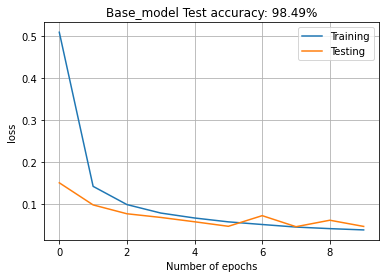

In [9]:
title = 'Base_model'

measure_model_perf(model, X_test, Y_test, history, title)

Confusion matrix

Epoch 1/20
469/469 [==============================] - 43s 88ms/step - loss: 0.7207 - accuracy: 0.7301 - val_loss: 0.4610 - val_accuracy: 0.8313
Epoch 2/20
469/469 [==============================] - 40s 86ms/step - loss: 0.4533 - accuracy: 0.8341 - val_loss: 0.3847 - val_accuracy: 0.8574
Epoch 3/20
469/469 [==============================] - 40s 86ms/step - loss: 0.3901 - accuracy: 0.8563 - val_loss: 0.3235 - val_accuracy: 0.8806
Epoch 4/20
469/469 [==============================] - 40s 85ms/step - loss: 0.3564 - accuracy: 0.8697 - val_loss: 0.3033 - val_accuracy: 0.8918
Epoch 5/20
469/469 [==============================] - 40s 85ms/step - loss: 0.3305 - accuracy: 0.8799 - val_loss: 0.2980 - val_accuracy: 0.8929
Epoch 6/20
469/469 [==============================] - 41s 88ms/step - loss: 0.3149 - accuracy: 0.8834 - val_loss: 0.2822 - val_accuracy: 0.9003
Epoch 7/20
469/469 [==============================] - 41s 87ms/step - loss: 0.2997 - accuracy: 0.8899 - val_loss: 0.2690 - val_accuracy:

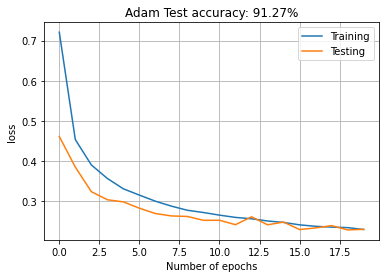

In [17]:
from keras.models import Sequential
from tensorflow.keras.optimizers import Adam

batch_size = 128
n_epoch = 20

title = 'Adam'

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=(height, width, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(Dropout(0.4))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(n_classes, activation='softmax'))

optimizer = Adam()

model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
history = model.fit(X_train, Y_train,
                    batch_size=batch_size, epochs=n_epoch,
                    verbose=1, validation_data=(X_test, Y_test))

measure_model_perf(model, X_test, Y_test, history, title)

Epoch 1/10
469/469 [==============================] - 183s 386ms/step - loss: 0.5726 - accuracy: 0.7904 - val_loss: 0.4924 - val_accuracy: 0.8166
Epoch 2/10
469/469 [==============================] - 170s 362ms/step - loss: 0.3579 - accuracy: 0.8666 - val_loss: 0.3017 - val_accuracy: 0.8896
Epoch 3/10
469/469 [==============================] - 191s 408ms/step - loss: 0.3060 - accuracy: 0.8869 - val_loss: 0.2870 - val_accuracy: 0.8938
Epoch 4/10
469/469 [==============================] - 182s 388ms/step - loss: 0.2776 - accuracy: 0.8962 - val_loss: 0.2566 - val_accuracy: 0.9080
Epoch 5/10
469/469 [==============================] - 177s 378ms/step - loss: 0.2561 - accuracy: 0.9048 - val_loss: 0.2451 - val_accuracy: 0.9100
Epoch 6/10
469/469 [==============================] - 171s 365ms/step - loss: 0.2409 - accuracy: 0.9101 - val_loss: 0.2393 - val_accuracy: 0.9104
Epoch 7/10
469/469 [==============================] - 186s 397ms/step - loss: 0.2350 - accuracy: 0.9125 - val_loss: 0.2392 -

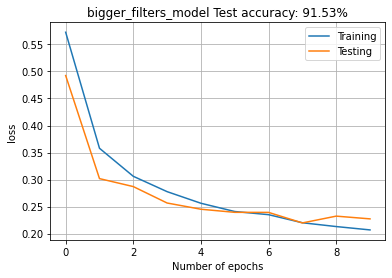

In [10]:
from tensorflow.keras.optimizers import Adam
from keras.layers import BatchNormalization

l0 = Input(shape=(height, width, 1), name='l0')

l1 = Conv2D(16, (5, 5), padding='same', activation='relu', name='l1')(l0)

l2 = Conv2D(16, (5, 5), padding='same', activation='relu', name='l2')(l1)
l2_bn = BatchNormalization(name='l2_bn')(l2)
l2_mp = MaxPooling2D(pool_size=(2, 2), name='l2_mp')(l2_bn)
l2_d = Dropout(0.3)(l2_mp)

l3 = Conv2D(32, (5, 5), padding='same', activation='relu', name='l3')(l2_d)

l4 = Conv2D(32, (3, 3), padding='same', activation='relu', name='l4')(l3)
l4_bn = BatchNormalization(name='l4_bn')(l4)
l4_mp = MaxPooling2D(pool_size=(2, 2), name='l4_mp')(l4_bn)
l4_d = Dropout(0.3)(l4_mp)

l5 = Conv2D(64, (5, 5), padding='same', activation='relu', name='l5')(l4_d)


l6 = Conv2D(64, (5, 5), padding='same', activation='relu', name='l6')(l5)
l6_bn = BatchNormalization(name='l6_bn')(l6)
l6_mp = MaxPooling2D(pool_size=(2, 2), name='l6_mp')(l6_bn)
l6_d = Dropout(0.3)(l6_mp)


flat = Flatten(name='flat')(l6_d)

l7 = Dense(64, activation='relu', name='l7')(flat)

l8 = Dense(n_classes, activation='softmax', name='l8')(l7)

model = Model(inputs=l0, outputs=l8)

batch_size = 128
n_epoch = 10

model.compile(loss='categorical_crossentropy', optimizer=Adam(), metrics=['accuracy'])
history = model.fit(X_train, Y_train, batch_size=batch_size, epochs=n_epoch, verbose=1, validation_data=(X_test, Y_test))

title = 'bigger_filters_model'

measure_model_perf(model, X_test, Y_test, history, title)

Epoch 1/10
938/938 [==============================] - 47s 49ms/step - loss: 0.5163 - accuracy: 0.8147 - val_loss: 0.4021 - val_accuracy: 0.8587
Epoch 2/10
938/938 [==============================] - 47s 50ms/step - loss: 0.3197 - accuracy: 0.8845 - val_loss: 0.3120 - val_accuracy: 0.8886
Epoch 3/10
938/938 [==============================] - 46s 49ms/step - loss: 0.2741 - accuracy: 0.9001 - val_loss: 0.2916 - val_accuracy: 0.8937
Epoch 4/10
938/938 [==============================] - 45s 48ms/step - loss: 0.2452 - accuracy: 0.9112 - val_loss: 0.2866 - val_accuracy: 0.8961
Epoch 5/10
938/938 [==============================] - 45s 48ms/step - loss: 0.2218 - accuracy: 0.9181 - val_loss: 0.2649 - val_accuracy: 0.9041
Epoch 6/10
938/938 [==============================] - 59s 63ms/step - loss: 0.2029 - accuracy: 0.9256 - val_loss: 0.2465 - val_accuracy: 0.9119
Epoch 7/10
938/938 [==============================] - 65s 69ms/step - loss: 0.1856 - accuracy: 0.9311 - val_loss: 0.2458 - val_accuracy:

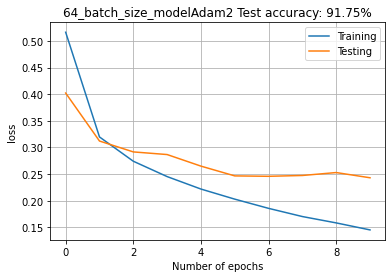

In [23]:
l0 = Input(shape=(height, width, 1), name='l0')

l1 = Conv2D(32, (3, 3), padding='same', activation='relu', name='l1')(l0)
l1_mp = MaxPooling2D(pool_size=(2, 2), name='l1_mp')(l1)


l2 = Conv2D(32, (3, 3), padding='same', activation='relu', name='l2')(l1_mp)
l2_mp = MaxPooling2D(pool_size=(2, 2), name='l2_mp')(l2)


l3 = Conv2D(64, (3, 3), padding='same', activation='relu', name='l3')(l2_mp)
l3_mp = MaxPooling2D(pool_size=(2, 2), name='l3_mp')(l3)


flat = Flatten(name='flat')(l3_mp)

l4 = Dense(128, activation='relu', name='l4')(flat)

l5 = Dense(n_classes, activation='softmax', name='l5')(l4)

model = Model(inputs=l0, outputs=l5)

batch_size = 64
n_epoch = 10

model.compile(loss='categorical_crossentropy', optimizer=Adam(), metrics=['accuracy'])
history = model.fit(X_train, Y_train, batch_size=batch_size, epochs=n_epoch, verbose=1, validation_data=(X_test, Y_test))

title = '64_batch_size_modelAdam2'

measure_model_perf(model, X_test, Y_test, history, title)

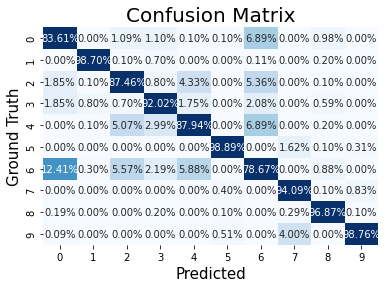

In [27]:
from tensorflow import metrics
import seaborn as sn
import pandas as pd

pred = model.predict(X_test)
pred = np.argmax(pred, axis=-1)

# print("F1-Score: ", metrics.f1_score(y_test, pred, average='micro'))

classes = ['tshirt', 'pantalon', 'pullover', 'robe', 'manteau', 'sandale', 'chemise', 'baskette', 'sac', 'bottes']

df_cm = pd.DataFrame(me.confusion_matrix(y_test, pred))
ax = sn.heatmap(df_cm/np.sum(df_cm), annot=True,
            fmt='.2%', cmap='Blues', vmax=0.2, cbar=False)

pl.title('Confusion Matrix', fontsize = 20) # title with fontsize 20
pl.xlabel('Predicted', fontsize = 15) # x-axis label with fontsize 15
pl.ylabel('Ground Truth', fontsize = 15) # y-axis label with fontsize 15

pl.show()

In [31]:
import sklearn.metrics as metrics

print("F1-Score: ", metrics.f1_score(y_test, pred, average='macro'))
print("Accuracy: ", metrics.accuracy_score(y_test, pred))

F1-Score:  0.9168502333723595
Accuracy:  0.9175
